In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/student/Desktop/BANA 275 NLP/Project/All Airlines.csv')

In [2]:
df.head(5)

,,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,0,United Airlines,1.0,Zachary Christensen,21st May 2022,✅ Trip Verified | Worst experience I have ever...,NaN,Couple Leisure,Economy Class,"Salt Lake City to Portland, Maine",22-May,1.0,1.0,NaN,NaN,1.0,1.0,no
1,1,United Airlines,2.0,Barbara Contente,21st May 2022,✅ Trip Verified | Very displeased with the fac...,NaN,Solo Leisure,Economy Class,Los Angeles to Lisbon via Washington,22-May,1.0,3.0,2.0,3.0,3.0,2.0,no
2,2,United Airlines,1.0,Gabe Hunters,21st May 2022,Not Verified | Absolutely terrible experience....,NaN,Family Leisure,Economy Class,"Kansas City, Missouri to Newark, New York",22-May,1.0,1.0,1.0,1.0,1.0,1.0,no
3,3,United Airlines,1.0,N Geale,21st May 2022,✅ Trip Verified | We were scheduled to leave P...,NaN,Couple Leisure,Economy Class,Pittsburgh to Newark,22-May,3.0,3.0,NaN,NaN,1.0,1.0,no
4,4,United Airlines,8.0,R Gonzaga,19th May 2022,✅ Trip Verified | First leg of trip to KUL. Dr...,Boeing 737-900Max,Solo Leisure,Premium Economy,Baltimore to Chicago O'Hare,22-May,2.0,4.0,3.0,NaN,2.0,4.0,yes


In [3]:
df.shape

(11573, 18)

In [4]:
pd.to_numeric(df['overall'])

0        1.0
1        2.0
2        1.0
3        1.0
4        8.0
        ... 
11568    1.0
11569    5.0
11570    1.0
11571    1.0
11572    1.0
Name: overall, Length: 11573, dtype: float64

In [5]:
df['customer_review'][0]

"✅ Trip Verified | Worst experience I have ever had flying. I have never flown United and I do not plan to ever again. First flight was cancelled on the 19th of May and then again on the 20th once we flew to our layover in Chicago. Then they gave us invalid meal and hotel vouchers at the customer service desk in Chicago. We didn't find out until we took the shuttle to the hotel, so we had to find a place to stay. Our flight they got us on wasn't even to our original destination. They also took our bags when we didn't want them checked due to an overbooked flight. Also we tried the online service and calling which both were terrible and no help. This was supposed to be our honeymoon and now it doesn't exist because of terrible service. Never fly united. We lost double of what the ticket cost."

In [6]:
# get strings after "|" symbol
df['reviews_only'] = df['customer_review'].str.split('|').str[1]

In [7]:
#remove the spaces at the beginning of string:
df['reviews_only'] = df['reviews_only'].str.lstrip()
df['reviews_only'].head(5)

0    Worst experience I have ever had flying. I hav...
1    Very displeased with the fact I had to pay $20...
2    Absolutely terrible experience. By far my wors...
3    We were scheduled to leave Pittsburgh at 6:14a...
4    First leg of trip to KUL. Dreadful check-in ex...
Name: reviews_only, dtype: object

## Word Cloud

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off")

In [9]:
import numpy as np
df['COVID_related'] = df['reviews_only'].str.contains('COVID|covid|mask|masks|pandemic')
df['COVID_related'] = np.where(df['COVID_related'] == True, 1, 0)

In [10]:
df['sentiment'] = np.where(df['overall'] > 7, 1, 0)
df.head()

,,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,...,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,reviews_only,COVID_related,sentiment
0,0,United Airlines,1.0,Zachary Christensen,21st May 2022,✅ Trip Verified | Worst experience I have ever...,NaN,Couple Leisure,Economy Class,"Salt Lake City to Portland, Maine",...,1.0,1.0,NaN,NaN,1.0,1.0,no,Worst experience I have ever had flying. I hav...,0,0
1,1,United Airlines,2.0,Barbara Contente,21st May 2022,✅ Trip Verified | Very displeased with the fac...,NaN,Solo Leisure,Economy Class,Los Angeles to Lisbon via Washington,...,1.0,3.0,2.0,3.0,3.0,2.0,no,Very displeased with the fact I had to pay $20...,0,0
2,2,United Airlines,1.0,Gabe Hunters,21st May 2022,Not Verified | Absolutely terrible experience....,NaN,Family Leisure,Economy Class,"Kansas City, Missouri to Newark, New York",...,1.0,1.0,1.0,1.0,1.0,1.0,no,Absolutely terrible experience. By far my wors...,0,0
3,3,United Airlines,1.0,N Geale,21st May 2022,✅ Trip Verified | We were scheduled to leave P...,NaN,Couple Leisure,Economy Class,Pittsburgh to Newark,...,3.0,3.0,NaN,NaN,1.0,1.0,no,We were scheduled to leave Pittsburgh at 6:14a...,0,0
4,4,United Airlines,8.0,R Gonzaga,19th May 2022,✅ Trip Verified | First leg of trip to KUL. Dr...,Boeing 737-900Max,Solo Leisure,Premium Economy,Baltimore to Chicago O'Hare,...,2.0,4.0,3.0,NaN,2.0,4.0,yes,First leg of trip to KUL. Dreadful check-in ex...,0,1


In [11]:
# filter for customers who mentioned COVID in their reviews, who is also unsatisfied with the service
covid_unhappy = df.loc[(df['COVID_related'] == 1) & (df['sentiment'] == 0)]
covid_unhappy = covid_unhappy.reset_index()
covid_unhappy['airline'].unique()

array(['United Airlines', 'Southwest Airlines', 'Delta Air Lines',
       'Alaska Airlines', 'American Airlines'], dtype=object)

In [12]:
reviews = [];
for i in range(len(covid_unhappy.index)):
    reviews.append(covid_unhappy['reviews_only'][i].lower())
reviews  

['my direct flight from san francisco to singapore was cancelled and the service which followed from united airlines can only be described as diabolical. firstly we were informed by the pilot whist sitting on the plane that he was "just about to take the break off the plane when someone on the ground noticed a fuel leak". what sort of safety measures is this company taking pre take off if someone only noticed a flight leak this late in the game? we sat on the plane for another hour waiting for the fuel leak to be investigated and eventually we were sent back to the airport. by this time it was 1am. we lined up waiting to speak to united staff to obtain more information however the queues were barely moving. by 2am i decided to get my hold luggage and leave. we were told the incorrect information 3 times by united officials with regards to where to collect our bags. i eventually asked a cleaner who kindly took me to the right place. we were also told to collect hotel vouchers from the u

In [13]:
review_string = " ".join(str(x) for x in reviews)

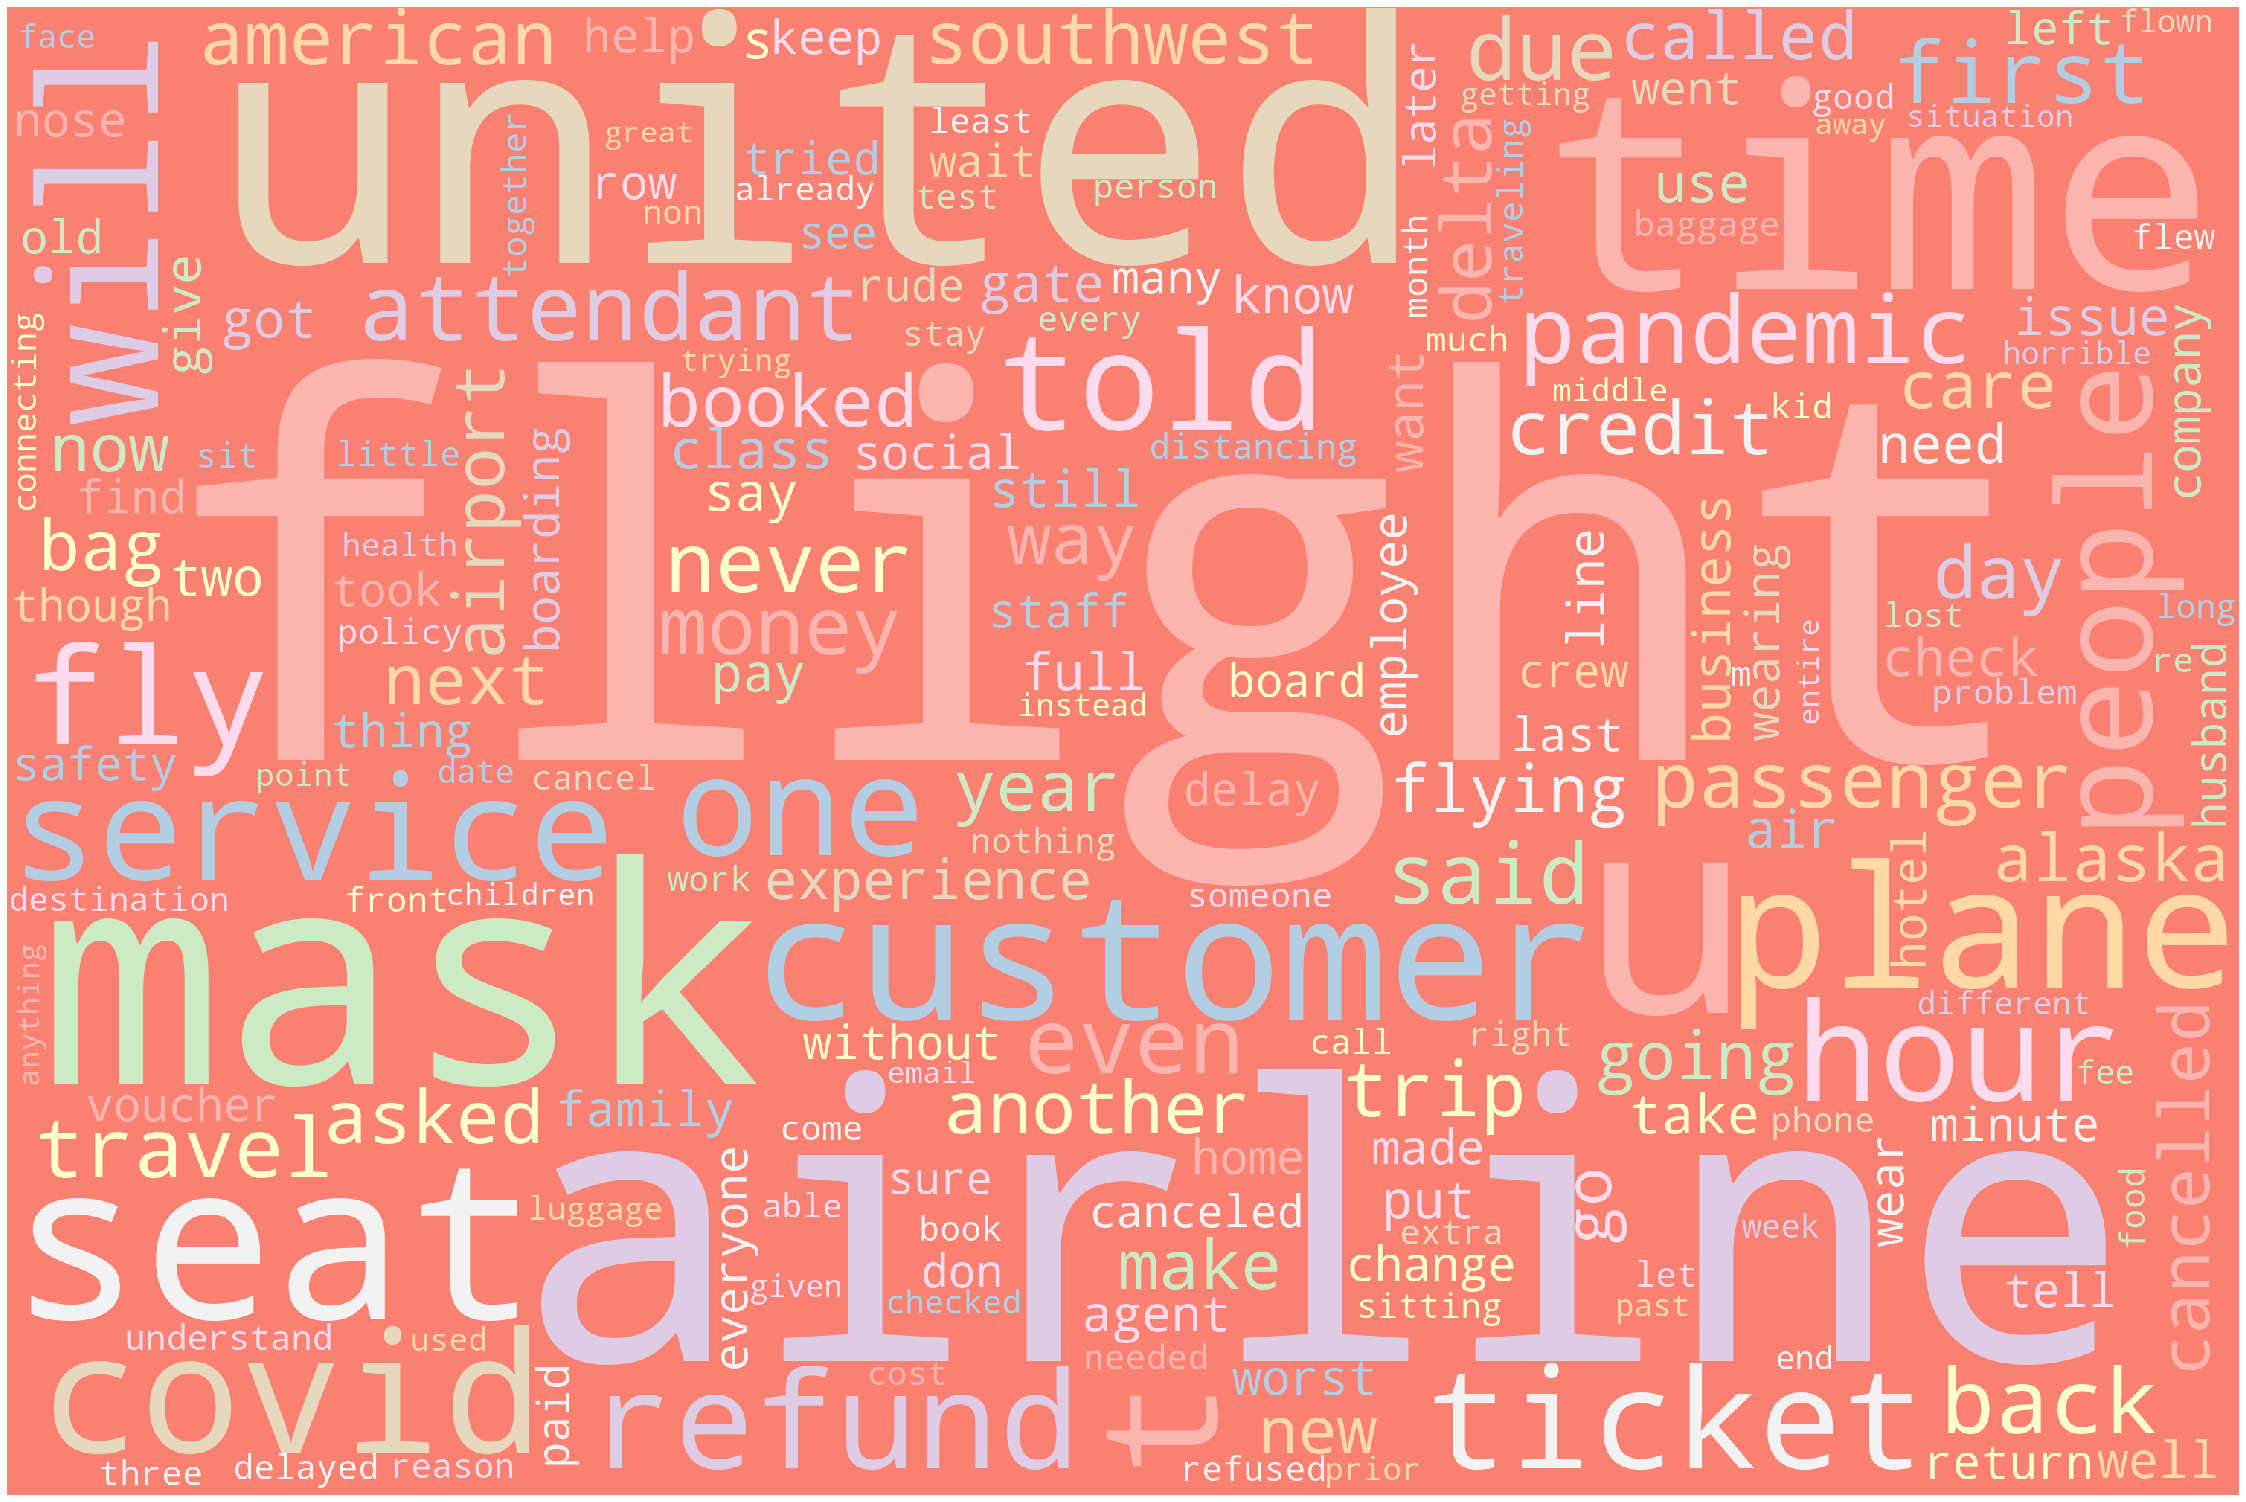

In [14]:
wordcloud = WordCloud(width = 3000, 
                      height = 2000, 
                      random_state=1, 
                      background_color='salmon', 
                      colormap='Pastel1', 
                      collocations=False, 
                      stopwords = STOPWORDS).generate(review_string)
plot_cloud(wordcloud)

## Modeling

In [14]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

%pip install scikit-learn
import sklearn
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
#from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import NMF, LatentDirichletAllocation

%pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

%pip install nltk
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [15]:
# Encoding rating above 7s as 1 (positive sentiment) and 1s and 2s as 0 (negative sentiment)
df['sentiment'] = np.where(df['overall'] > 7, 1, 0)
df.head()

,,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,...,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,reviews_only,COVID_related,sentiment
0,0,United Airlines,1.0,Zachary Christensen,21st May 2022,✅ Trip Verified | Worst experience I have ever...,NaN,Couple Leisure,Economy Class,"Salt Lake City to Portland, Maine",...,1.0,1.0,NaN,NaN,1.0,1.0,no,Worst experience I have ever had flying. I hav...,0,0
1,1,United Airlines,2.0,Barbara Contente,21st May 2022,✅ Trip Verified | Very displeased with the fac...,NaN,Solo Leisure,Economy Class,Los Angeles to Lisbon via Washington,...,1.0,3.0,2.0,3.0,3.0,2.0,no,Very displeased with the fact I had to pay $20...,0,0
2,2,United Airlines,1.0,Gabe Hunters,21st May 2022,Not Verified | Absolutely terrible experience....,NaN,Family Leisure,Economy Class,"Kansas City, Missouri to Newark, New York",...,1.0,1.0,1.0,1.0,1.0,1.0,no,Absolutely terrible experience. By far my wors...,0,0
3,3,United Airlines,1.0,N Geale,21st May 2022,✅ Trip Verified | We were scheduled to leave P...,NaN,Couple Leisure,Economy Class,Pittsburgh to Newark,...,3.0,3.0,NaN,NaN,1.0,1.0,no,We were scheduled to leave Pittsburgh at 6:14a...,0,0
4,4,United Airlines,8.0,R Gonzaga,19th May 2022,✅ Trip Verified | First leg of trip to KUL. Dr...,Boeing 737-900Max,Solo Leisure,Premium Economy,Baltimore to Chicago O'Hare,...,2.0,4.0,3.0,NaN,2.0,4.0,yes,First leg of trip to KUL. Dreadful check-in ex...,0,1


### 1. Clean Review Text

In [16]:
def CleanText(text):
    
    # Remove non-character
    letters = re.sub("[^a-zA-Z]", " ", str())
    
    # Convert to lower case
    lower = letters.lower().split()
    
    # Remove stopwords
    stops = set(stopwords.words("english"))
    words = [w for w in lower if not w in stops]
    
    # Lemmatization 
    lemmatizer=WordNetLemmatizer()
    root = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(root)

In [17]:
df['cleaned_review'] = df['reviews_only'].apply(lambda x: CleanText(x))

### 2. Split Training & Testing Dataset

In [18]:
X = df['reviews_only']
Y = df['sentiment']

X_Train, X_test, Y_Train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=225)
X_train, X_val, Y_train, Y_val = train_test_split(X_Train, Y_Train, test_size=0.2, random_state=225)

In [19]:
print(len(X_train), len(X_val), len(X_Train), len(X_test))

7406 1852 9258 2315


In [20]:
# CountVector 
countVect = CountVectorizer()
X_train_countVect = countVect.fit_transform(X_train.apply(lambda x: np.str_(x)))
X_val_countVect = countVect.transform(X_val.apply(lambda x: np.str_(x)))

# TFIDF 
tfidf = TfidfVectorizer(min_df=5)
X_train_tfidf = tfidf.fit_transform(X_train.apply(lambda x: np.str_(x)))
X_val_tfidf = tfidf.transform(X_val.apply(lambda x: np.str_(x)))

## Baseline Model - Logistic Regression 

In [21]:
print('Result Using CountVector:')
lr = LogisticRegression(random_state=42, max_iter = 300)
lr.fit(X_train_countVect, Y_train)
Y_pred = lr.predict(X_val_countVect)
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(Y_val, Y_pred)))
print("\nAUC score : {:.4f}".format(roc_auc_score(Y_val, Y_pred)))
print("\nClassification report : \n", classification_report(Y_val, Y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(Y_val, Y_pred))

print('\n\n')
print('Result Using TFIDF:')
lr = LogisticRegression(random_state=42, max_iter = 300)
lr.fit(X_train_tfidf, Y_train)
Y_pred = lr.predict(X_val_tfidf)
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(Y_val, Y_pred)))
print("\nAUC score : {:.4f}".format(roc_auc_score(Y_val, Y_pred)))
print("\nClassification report : \n", classification_report(Y_val, Y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(Y_val, Y_pred))

Result Using CountVector:

Accuracy on validation set: 0.9033

AUC score : 0.7199

Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      1569
           1       0.84      0.46      0.59       283

    accuracy                           0.90      1852
   macro avg       0.87      0.72      0.77      1852
weighted avg       0.90      0.90      0.89      1852


Confusion Matrix : 
 [[1544   25]
 [ 154  129]]



Result Using TFIDF:

Accuracy on validation set: 0.8947

AUC score : 0.6656

Classification report : 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      1569
           1       0.93      0.34      0.49       283

    accuracy                           0.89      1852
   macro avg       0.91      0.67      0.72      1852
weighted avg       0.90      0.89      0.87      1852


Confusion Matrix : 
 [[1562    7]
 [ 188   95]]


In [ ]:
# Weighted Logistic Regression
wlr = LogisticRegression(random_state=42, n_jobs = -1)

class_weight = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:0.1,1:1}, {0:1,1:10}, {0:1,1:100}]
hyperparameters = dict(class_weight = class_weight)

clf = GridSearchCV(wlr, hyperparameters, scoring = 'accuracy', cv=5, verbose=0, n_jobs =-1)
clf.fit(X_train_countVect, Y_train)
best_model_wlr = clf.best_estimator_
print(clf.best_params_, clf.best_score_)

Y_pred = best_model_wlr.predict(X_val_tfidf)
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(Y_val, Y_pred)))
print("\nAUC score : {:.4f}".format(roc_auc_score(Y_val, Y_pred)))
print("\nClassification report : \n", classification_report(Y_val, Y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(Y_val, Y_pred))

In [23]:
# Naive Bayes 
mnb = MultinomialNB()

alpha = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
hyperparameters = dict(alpha = alpha)

clf = GridSearchCV(mnb, hyperparameters, scoring = 'accuracy', cv=5, verbose=0, n_jobs =-1)
clf.fit(X_train_tfidf, Y_train)
best_model_mnb = clf.best_estimator_
Y_pred = best_model_mnb .predict(X_val_tfidf)
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(Y_val, Y_pred)))
print("\nAUC score : {:.4f}".format(roc_auc_score(Y_val, Y_pred)))
print("\nClassification report : \n", classification_report(Y_val, Y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(Y_val, Y_pred))


Accuracy on validation set: 0.8785

AUC score : 0.6358

Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93      1569
           1       0.78      0.29      0.42       283

    accuracy                           0.88      1852
   macro avg       0.83      0.64      0.68      1852
weighted avg       0.87      0.88      0.85      1852


Confusion Matrix : 
 [[1546   23]
 [ 202   81]]


In [24]:
# Random Forest 
rf = RandomForestClassifier(n_jobs = -1)
estimators=[10,50,100,500]
depths=[4,8,10,20] 
hyperparameters = dict(n_estimators=estimators, max_depth=depths)

clf = GridSearchCV(rf, hyperparameters, scoring = 'accuracy', cv=5, n_jobs=-1, verbose=1)
clf.fit(X_train_tfidf, Y_train)
best_model_rf = clf.best_estimator_
Y_pred = best_model_rf.predict(X_val_tfidf)
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(Y_val, Y_pred)))
print("\nAUC score : {:.4f}".format(roc_auc_score(Y_val, Y_pred)))
print("\nClassification report : \n", classification_report(Y_val, Y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(Y_val, Y_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Accuracy on validation set: 0.8683

AUC score : 0.5848

Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93      1569
           1       0.82      0.18      0.29       283

    accuracy                           0.87      1852
   macro avg       0.84      0.58      0.61      1852
weighted avg       0.86      0.87      0.83      1852


Confusion Matrix : 
 [[1558   11]
 [ 233   50]]
